<Axes: >

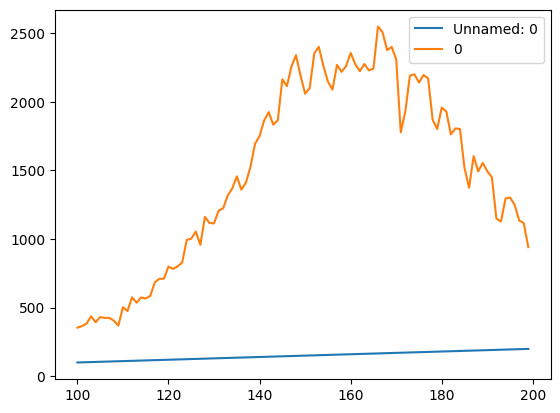

In [5]:
import pandas as pd

df = pd.read_csv('./datasets/COVID_ADMISSIONS_CA.csv')
df[100:200].plot()